# SARSCov2 NSP4 Structure Prediction

We will perform comparative homology modelling via the satisfaction of spatial restraints using the `modeller` package.

In [1]:
from modeller import *
from Bio.PDB import *
import numpy as np
import homology_modelling as hg
import seaborn as sns; sns.set()
import nglview as ngv

env = environ()


                         MODELLER 9.25, 2020/09/03, r11894

     PROTEIN STRUCTURE MODELLING BY SATISFACTION OF SPATIAL RESTRAINTS


                     Copyright(c) 1989-2020 Andrej Sali
                            All Rights Reserved

                             Written by A. Sali
                               with help from
              B. Webb, M.S. Madhusudhan, M-Y. Shen, G.Q. Dong,
          M.A. Marti-Renom, N. Eswar, F. Alber, M. Topf, B. Oliva,
             A. Fiser, R. Sanchez, B. Yerkovich, A. Badretdinov,
                     F. Melo, J.P. Overington, E. Feyfant
                 University of California, San Francisco, USA
                    Rockefeller University, New York, USA
                      Harvard University, Cambridge, USA
                   Imperial Cancer Research Fund, London, UK
              Birkbeck College, University of London, London, UK


Kind, OS, HostName, Kernel, Processor: 4, Darwin Skynet.local 19.6.0 x86_64
Date and time of compilation     

### NSP4 amino acid sequence
Observe the amino acid sequence of the region of the NSP4 protein specified in the `.ali` file.

In [2]:
!cat NSP4.ali

>P1;NSP4
sequence:NSP4:::::::0.00: 0.00
ITREIGFIVPGLPGTVLRAINGDFLHFLPRVFSAVGNICYTPSKLIEYSDFATSACVLAAECTIFKDAMGKPVPY
CYDTNLLEGSISYSELRPDTRYVLMDGSIIQFPNTYLEGSVRVVTTFDAEYCRHGTCERSEVGICLSTSGRWVLN
NEHYR*


## 1. PSI-BLAST
Read the `.ali` file and modify the string into the required NCBI format `.faa` for PSI-BLAST.

In [3]:
hg.ali_to_faa("NSP4.ali")

Call `psiblast` from the command line. Run PSI-BLAST over the `pdbaa` database which contains non-redundant sequences of all proteins with structures in the Protein Data Bank.

*Note*: In this case we will run PSI-BLAST to convergence. To speed up the process we can run it in the local directory.

In [4]:
#!update_blastdb.pl --decompress pdbaa #to download the pdbaa database locally
!psiblast -db pdbaa -query "NSP4.faa" -inclusion_ethresh 1e-3 -evalue 1e-3 -num_iterations 0

PSIBLAST 2.11.0+


Reference: Stephen F. Altschul, Thomas L. Madden, Alejandro A.
Schaffer, Jinghui Zhang, Zheng Zhang, Webb Miller, and David J.
Lipman (1997), "Gapped BLAST and PSI-BLAST: a new generation of
protein database search programs", Nucleic Acids Res. 25:3389-3402.


Reference for compositional score matrix adjustment: Stephen F.
Altschul, John C. Wootton, E. Michael Gertz, Richa Agarwala,
Aleksandr Morgulis, Alejandro A. Schaffer, and Yi-Kuo Yu (2005)
"Protein database searches using compositionally adjusted
substitution matrices", FEBS J. 272:5101-5109.


Reference for composition-based statistics starting in round 2:
Alejandro A. Schaffer, L. Aravind, Thomas L. Madden, Sergei
Shavirin, John L. Spouge, Yuri I. Wolf, Eugene V. Koonin, and
Stephen F. Altschul (2001), "Improving the accuracy of PSI-BLAST
protein database searches with composition-based statistics and
other refinements", Nucleic Acids Res. 29:2994-3005.



Database: PDB protein database
           120,434 seq

### Template Selection

Protein **1T70 (chain 'A')** which is a ***Deinococcus* phosphatase** is the hit with lowest E-value: 8e-55 and the highest sequence identity: ~30% (in round 4). The rest of the hits have sequence identity <20%. 
We will use 1T70A as a template for our model.

## 2. Refining Target-Template Alignment
Get the `.pdb` file for the protein 1T70.

In [5]:
pdb_file = PDBList().retrieve_pdb_file('1T70',file_format='pdb')

Structure exists: '/Users/shivamchitnis/Documents/GitHub/Modeller/t7/pdb1t70.ent' 


Align the template and the target sequence precisely.

In [6]:
hg.precise_align(env,targ='NSP4',tmp='1t70',tmp_pdb=pdb_file,model_segment=('FIRST:A','LAST:A'))

mkapsa__637W> No residue topology library is in memory.
              Better radii would be used if topology.read() is called first.
iup2crm_280W> No topology library in memory or assigning a BLK residue.
              Default CHARMM atom type assigned:  N -->  N
              This message is written only for the first such atom.

Pairwise dynamic programming alignment (ALIGN2D):
  Residue-residue metric   : $(LIB)/as1.sim.mat
  Diagonal                 :          100
  Overhang                 :            0
  Maximal gap length       :       999999
  Local alignment          :            F
  MATRIX_OFFSET (local aln):       0.0000
  FIX_OFFSETS              :      0.0    -1.0    -2.0    -3.0    -4.0
  N_SUBOPT                 :            0
  SUBOPT_OFFSET            :       0.0000
  Alignment block          :            1
  Gap introduction penalty :    -100.0000
  Gap extension penalty    :       0.0000
  Gap diagonal penalty     :       0.0000
  Structure gap penalties  :    3.500

Observe the alignment of the template 17T0A and the target NSP4.

In [7]:
!cat NSP4-1t70A.pap

 _aln.pos         10        20        30        40        50        60
1t70A     MRVLFIGDVFGQPGRRVLQNHLPTIRPQFDFVIVNMENSAGGFGMHRDAARGALEAGAGCLTLGNHAW 
NSP4      -------------------------------------------------------------------- 
 _consrvd

 _aln.p   70        80        90       100       110       120       130
1t70A     HHKDIYPMLSEDTYPIVRPLNYADPGTPGVGWRTFDVNGEKLTVVNLLGRVFMEAVDNPFRTMDALLE 
NSP4      ---------------ITREIGFIVPGLPGTVLRAIN-----GDFLHFLPRVFS-AVGNICYTPSKLIE 
 _consrvd                * *      ** **   *              * ***  ** *   *   * *

 _aln.pos  140       150       160       170       180       190       200
1t70A     RDDLGTVFVDFHAEATSEKEAMGWHLAG--RVAAVIGTHTHVPT-ADTRILK-GGTAYQTDAGFTGPH 
NSP4      YSDFATSACVLAAECTIFKDAMGKPVPYCYDTNLLEGSISYSELRPDTRYVLMDGSIIQFPNTYLE-- 
 _consrvd   *  *      ** *  * ***             *         ***     *   *

 _aln.pos    210       220       230       240       250
1t70A     DSIIGSAIEGPLQRFLTERPHRYGVAEGRAELNGVALHFEGGKATAAERYRFIED 
NSP4      ----G

## 3. Constructing Model 
### by Satisying Spatial Restraints

In [8]:
hg.model_maker(env,tmp='1t70A',targ='NSP4')


check_ali___> Checking the sequence-structure alignment. 

Implied intrachain target CA(i)-CA(i+1) distances longer than  8.0 angstroms:

ALN_POS  TMPL  RID1  RID2  NAM1  NAM2     DIST
----------------------------------------------
END OF TABLE
read_to_681_> topology.submodel read from topology file:        3
The following 1 residues contain 6-membered rings with poor geometries
after transfer from templates. Rebuilding rings from internal coordinates:
   <Residue 88 (type TYR)>
mdtrsr__446W> A potential that relies on one protein is used, yet you have at
              least one known structure available. MDT, not library, potential is used.
0 atoms in HETATM/BLK residues constrained
to protein atoms within 2.30 angstroms
and protein CA atoms within 10.00 angstroms
0 atoms in residues without defined topology
constrained to be rigid bodies
condens_443_> Restraints marked for deletion were removed.
              Total number of restraints before, now:    12801    11716
iupac_m_397W> At

## 4. Evaluating Model and Template

Evaluate the model and the template. To do this, construct the DOPE profile. 

### Model Selection
We select `NSP4.B9999003.pdb` since it has the lowest overall DOPE score.

In [9]:
hg.dope_evaluate(env,'NSP4.B99990003.pdb', 'NSP4.profile')
hg.dope_evaluate(env, pdb_file, '1t70A.profile', model_segment=('FIRST:A', 'LAST:A'))

read_to_681_> topology.submodel read from topology file:        3
>> Model assessment by DOPE potential
iatmcls_286W> MODEL atom not classified:  ARG:OXT  ARG
preppdf_453W> No fixed restraints selected; there may be some dynamic ones.
preppdf_454W> Restraints file was probably not read; use restraints.append().


>> ENERGY; Differences between the model's features and restraints:
Number of all residues in MODEL                   :      155
Number of all, selected real atoms                :     1215    1215
Number of all, selected pseudo atoms              :        0       0
Number of all static, selected restraints         :        0       0
COVALENT_CYS                                      :        F
NONBONDED_SEL_ATOMS                               :        1
Number of non-bonded pairs (excluding 1-2,1-3,1-4):   191935
Dynamic pairs routine                             : 1, NATM x NATM double loop
Atomic shift for contacts update (UPDATE_DYNAMIC) :    0.390
LENNARD_JONES_SWITCH      

## 5. Visualizing Protein Structure
### Model - `NSP4.B99990003.pdb`

In [10]:
mdl_v = ngv.show_structure_file('NSP4.B99990003.pdb')
mdl_v.display()

NGLWidget()

In [11]:
mdl_v.render_image();

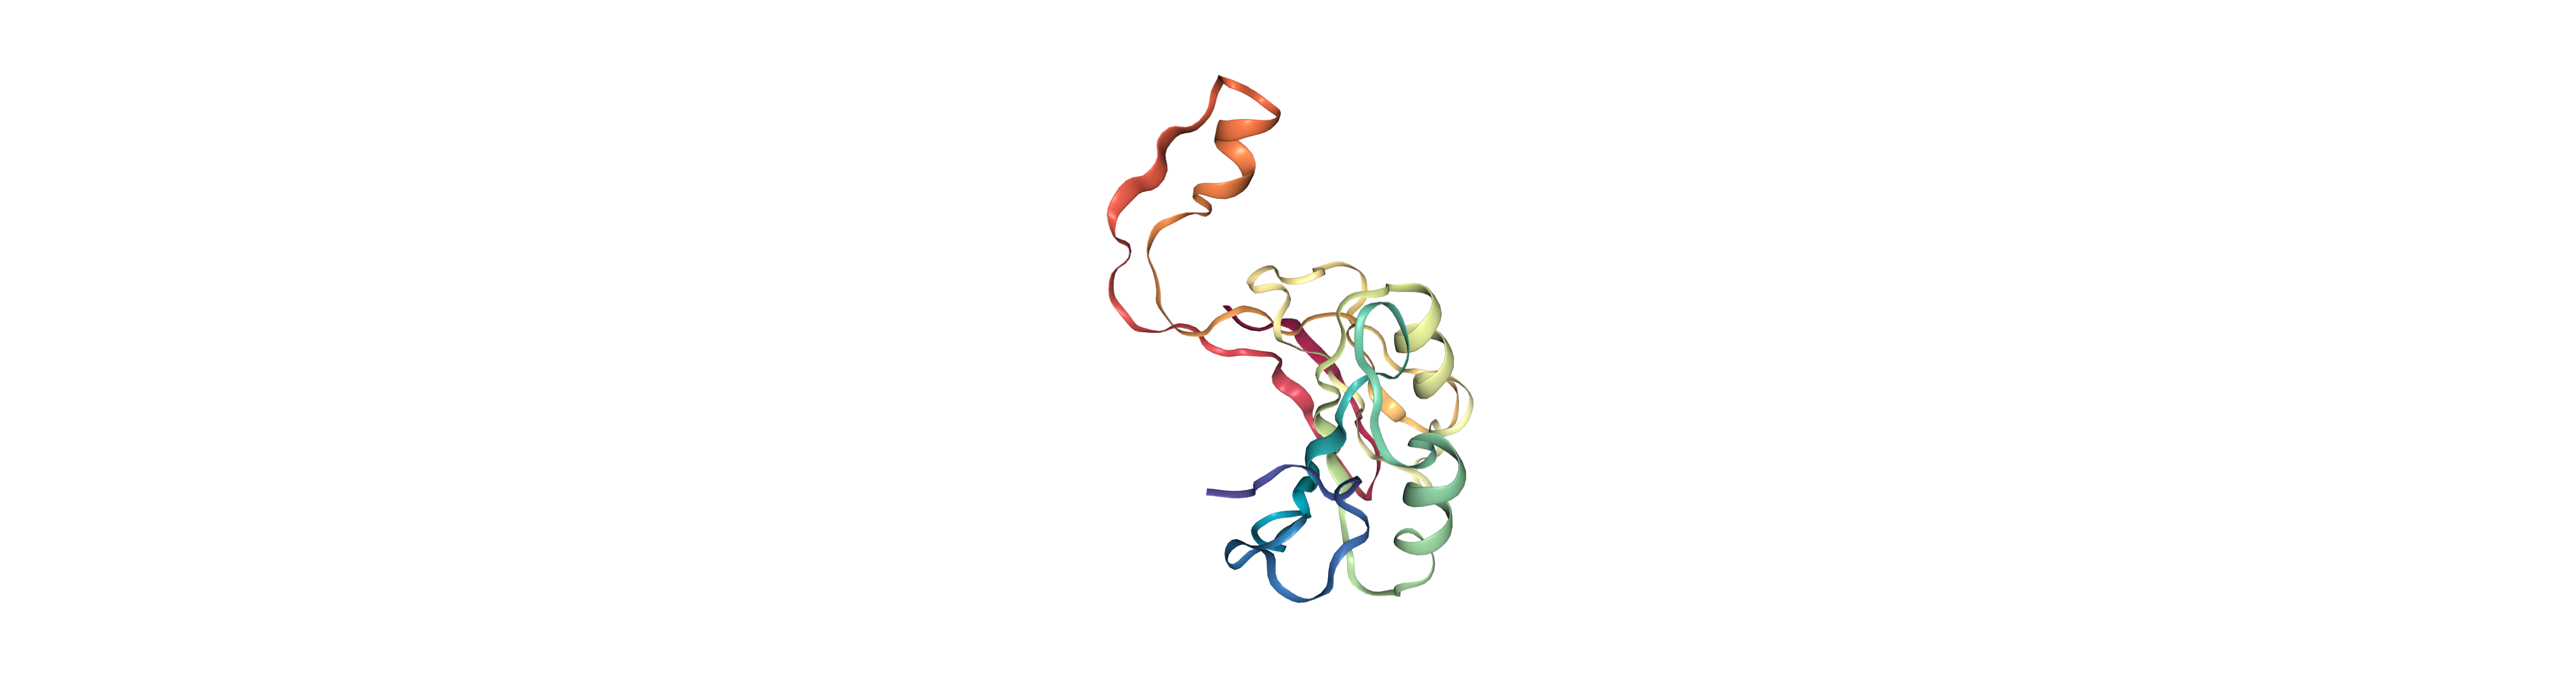

In [18]:
mdl_v._display_image()

### Template - 1T70 Chain A

In [13]:
parser = PDBParser()
structure = parser.get_structure("1t70", pdb_file)
tmp_v = ngv.show_biopython(structure[0]["A"])
tmp_v

/usr/local/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16535.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16593.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16649.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16704.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 16743.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 16769.
  warnings.warn(
/usr/local/lib/python3.9/site-pack

NGLWidget()

In [14]:
tmp_v.render_image();

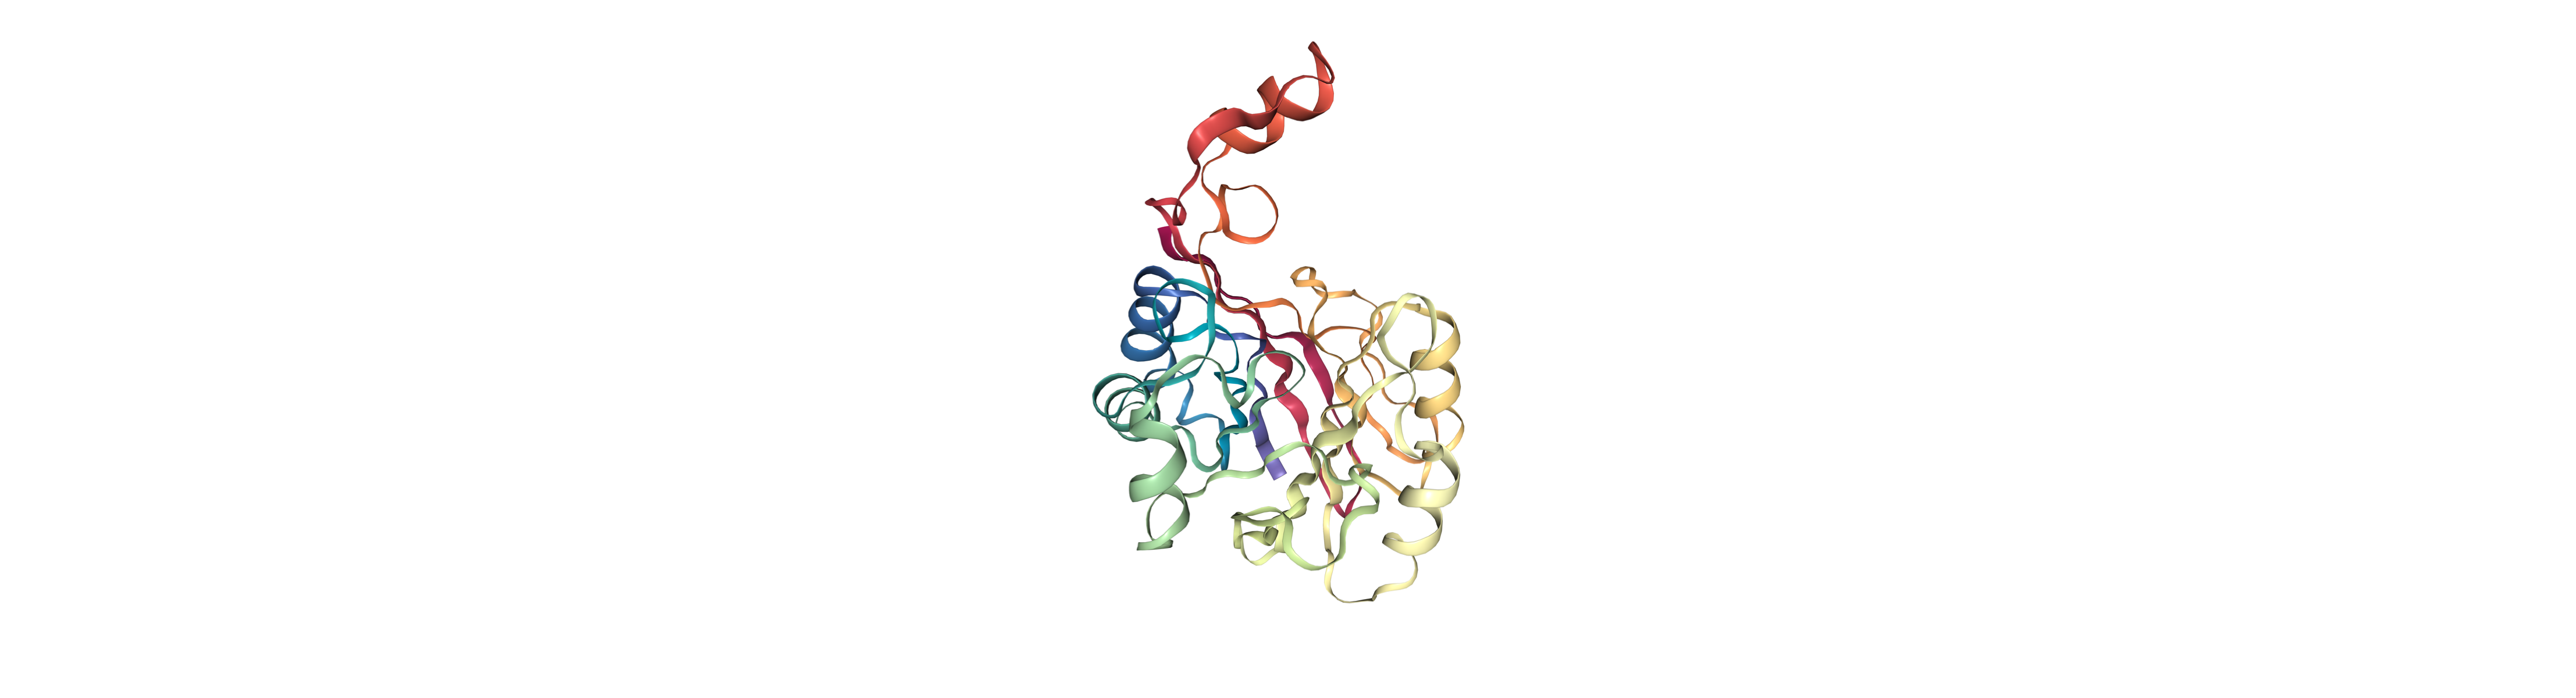

In [17]:
tmp_v._display_image()

## 6. Visualizing DOPE Profile

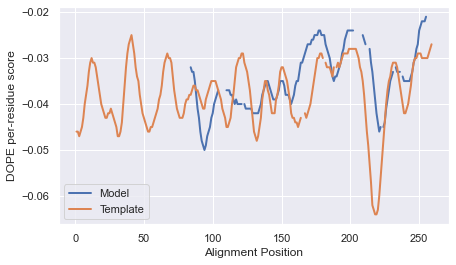

In [16]:
hg.dope_plot(env,"1t70A","NSP4",save=True)

## Comments
The DOPE profile of the model follows that of the template quite well except in a small region at the C-terminus. This is despite the low sequence similarity of the template with the target sequence. Retrospectively, the sequence similarity is low since we are only modelling a small region of the NSP4 protein.